# Arinthi - M-Ighty Use Case.

Dataset : 20200124_ews_observations.csv, anonimized EWS patient data from the Royal Papworth Hospital (https://royalpapworth.nhs.uk/).

Arinti : https://arinti.ai - Wouter Baetens

M-Igthy : http://www.m-ighty.com/



###### Column Legend:

PatientId: Unique identifier for the patient

ObservationDate: Date of the observation

EwsProcedure: Which EWS procedure has been used (> in your dataset, this will normally always be NEWS2.0)

EWS_Total: Total EWS score

SBP: Systolic Blood Pressure

SBP_Score: Contribution of SBP parameter to total EWS score

LOC: Level Of Consciousness

LOC_Score: Contribution of LOC parameter to total EWS score

SpO2: Peripheral capillary oxygen saturation (the amount of oxygen in the blood)

SpO2_Score: Contribution of SpO2 parameter to total EWS score

Add_O2: Is the patient receiving additional oxygen or not

Add_O2_Score: Contribution of Add_O2 parameter to total EWS score

HR: Heartrate

HR_Score: Contribution of HR parameter to total EWS score

RR: Respiratory Rate

RR_Score: Contribution of RR parameter to total EWS score

TEMP: Patient body temperature

TEMP_Score: Contribution of TEMP parameter to total EWS score



## Variables studied

Load dataset:

In [1]:
import pandas as pd
import numpy as np

#df = pd.read_csv('20200124_ews_observations.csv', dtype={'SpO2_Score': np.float32})
df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)

In [2]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,171726,171727,171728,171729,171730,171731,171732,171733,171734,171735
PatientId,29,30,31,32,33,32,34,35,32,36,...,10239,20355,4735,20532,20480,20278,20480,2499,20527,4853
ObservationDate,2019-05-01 13:27:50.0000000,2019-05-01 15:27:44.0000000,2019-05-01 15:54:27.0000000,2019-05-01 16:07:27.0000000,2019-05-01 17:03:16.0000000,2019-05-01 18:02:29.0000000,2019-05-01 19:23:49.0000000,2019-05-01 21:07:36.0000000,2019-05-01 21:08:05.0000000,2019-05-01 21:12:11.0000000,...,2020-01-02 08:39:12.0000000,2020-01-02 08:40:42.0000000,2020-01-02 08:44:24.0000000,2020-01-02 08:46:42.0000000,2020-01-02 08:48:53.0000000,2020-01-02 08:57:05.0000000,2020-01-02 08:58:46.0000000,2020-01-02 09:03:14.0000000,2020-01-02 09:03:20.0000000,2020-01-02 09:03:56.0000000
EwsProcedure,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,...,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2
EWS_Total,0,3,1,0,0,0,0,0,0,2,...,3,0,8,1,2,3,3,0,0,1
SBP,143,NaN,117,NaN,135,NaN,NaN,NaN,125,NaN,...,90,NaN,147,145,137,88,83,118,129,133
SBP_Score,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,...,3,NaN,0,0,0,3,3,0,0,0
LOC,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,...,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT
LOC_Score,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SpO2,96,94,95,98,97,96,97,98,97,97,...,88,98,89,99,97,100,92,98,98,98
SpO2_Score,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(171736, 18)

We have 171736 rows, 17 features and 1 target (EWS_Total).

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientId,171736,NaN,NaN,NaN,5174.34,3613.34,29,2263,4764,7549,20532
ObservationDate,171736,170783,2019-12-17 20:27:07.0000000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EwsProcedure,171736,1,NEWS2,171736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EWS_Total,171736,NaN,NaN,NaN,1.92954,1.89039,0,0,1,3,19
SBP,160949,NaN,NaN,NaN,120.689,19.5999,0,107,119,133,234
SBP_Score,160949,NaN,NaN,NaN,0.499096,0.813013,0,0,0,1,3
LOC,171736,5,ALERT,171079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOC_Score,171736,NaN,NaN,NaN,0.0114769,0.185201,0,0,0,0,3
SpO2,171734,NaN,NaN,NaN,95.9474,3.77799,0,95,96,98,100
SpO2_Score,171734,NaN,NaN,NaN,0.355928,0.690071,0,0,0,1,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [6]:
df.columns

Index(['PatientId', 'ObservationDate', 'EwsProcedure', 'EWS_Total', 'SBP',
       'SBP_Score', 'LOC', 'LOC_Score', 'SpO2', 'SpO2_Score', 'Add_O2',
       'Add_O2_Score', 'HR', 'HR_Score', 'RR', 'RR_Score', 'TEMP',
       'TEMP_Score'],
      dtype='object')

In [7]:
df.dtypes

PatientId            int64
ObservationDate     object
EwsProcedure        object
EWS_Total            int64
SBP                float64
SBP_Score          float64
LOC                 object
LOC_Score            int64
SpO2               float64
SpO2_Score         float64
Add_O2              object
Add_O2_Score       float64
HR                   int64
HR_Score             int64
RR                   int64
RR_Score             int64
TEMP               float64
TEMP_Score           int64
dtype: object

In [8]:
df.index

RangeIndex(start=0, stop=171736, step=1)

In [9]:
df.isnull().sum(axis = 0)

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [10]:
df.duplicated().any()

True

In [11]:
DuplicateRowsDF = df[df.duplicated()]
DuplicateRowsDF

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
151,52,2019-05-03 18:46:40.0000000,NEWS2,1,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,84,0,17,0,37.7,0
10734,942,2019-05-30 13:40:41.0000000,NEWS2,2,159.0,0.0,ALERT,0,98.0,0.0,True,2.0,79,0,18,0,38.0,0
17533,1365,2019-06-11 18:51:39.0000000,NEWS2,0,136.0,0.0,ALERT,0,97.0,0.0,False,0.0,86,0,17,0,36.5,0
17534,1241,2019-06-11 18:51:44.0000000,NEWS2,2,129.0,0.0,ALERT,0,89.0,0.0,True,2.0,84,0,17,0,37.3,0
17535,1146,2019-06-11 18:51:53.0000000,NEWS2,3,124.0,0.0,ALERT,0,91.0,3.0,False,0.0,80,0,19,0,37.8,0
17539,1519,2019-06-11 18:56:10.0000000,NEWS2,6,104.0,1.0,ALERT,0,24.0,3.0,True,2.0,66,0,12,0,36.8,0
17542,1494,2019-06-11 18:57:04.0000000,NEWS2,8,120.0,0.0,ALERT,0,85.0,3.0,True,2.0,84,0,25,3,36.6,0
17546,1376,2019-06-11 18:59:02.0000000,NEWS2,4,98.0,2.0,ALERT,0,92.0,2.0,False,0.0,61,0,18,0,36.4,0
17550,1023,2019-06-11 19:00:40.0000000,NEWS2,4,105.0,1.0,ALERT,0,96.0,0.0,True,2.0,94,1,16,0,36.8,0
101007,6798,2019-10-05 23:10:48.0000000,NEWS2,3,114.0,0.0,ALERT,0,92.0,2.0,False,0.0,96,1,15,0,37.3,0


In [12]:
df[df.duplicated() == True]

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
151,52,2019-05-03 18:46:40.0000000,NEWS2,1,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,84,0,17,0,37.7,0
10734,942,2019-05-30 13:40:41.0000000,NEWS2,2,159.0,0.0,ALERT,0,98.0,0.0,True,2.0,79,0,18,0,38.0,0
17533,1365,2019-06-11 18:51:39.0000000,NEWS2,0,136.0,0.0,ALERT,0,97.0,0.0,False,0.0,86,0,17,0,36.5,0
17534,1241,2019-06-11 18:51:44.0000000,NEWS2,2,129.0,0.0,ALERT,0,89.0,0.0,True,2.0,84,0,17,0,37.3,0
17535,1146,2019-06-11 18:51:53.0000000,NEWS2,3,124.0,0.0,ALERT,0,91.0,3.0,False,0.0,80,0,19,0,37.8,0
17539,1519,2019-06-11 18:56:10.0000000,NEWS2,6,104.0,1.0,ALERT,0,24.0,3.0,True,2.0,66,0,12,0,36.8,0
17542,1494,2019-06-11 18:57:04.0000000,NEWS2,8,120.0,0.0,ALERT,0,85.0,3.0,True,2.0,84,0,25,3,36.6,0
17546,1376,2019-06-11 18:59:02.0000000,NEWS2,4,98.0,2.0,ALERT,0,92.0,2.0,False,0.0,61,0,18,0,36.4,0
17550,1023,2019-06-11 19:00:40.0000000,NEWS2,4,105.0,1.0,ALERT,0,96.0,0.0,True,2.0,94,1,16,0,36.8,0
101007,6798,2019-10-05 23:10:48.0000000,NEWS2,3,114.0,0.0,ALERT,0,92.0,2.0,False,0.0,96,1,15,0,37.3,0


In [13]:
df[df.duplicated() == True].count()

PatientId          14
ObservationDate    14
EwsProcedure       14
EWS_Total          14
SBP                13
SBP_Score          13
LOC                14
LOC_Score          14
SpO2               14
SpO2_Score         14
Add_O2             14
Add_O2_Score       14
HR                 14
HR_Score           14
RR                 14
RR_Score           14
TEMP               14
TEMP_Score         14
dtype: int64

In [14]:
def UniqueValues(df):
    # Print the number of unique values of each column, only printing those that have less than 100 unique values

    col = df.columns.tolist()  # Redo this list because columns dropped
    NbrSamples = len(df)

    for c in col:
        #s = sorted(set(df[c]))
        s = set(df[c])
        count = len(s)
        if count == NbrSamples:
            print(f"\n {c} \n\nPossible Index: {count} unique values")
        elif count < 100:
            print(f"\n {c}: {s}")
        else:
            print(f"\n {c}: {count} unique values")



In [15]:
UniqueValues(df)


 PatientId: 10136 unique values

 ObservationDate: 170783 unique values

 EwsProcedure: {'NEWS2'}

 EWS_Total: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19}

 SBP: 10964 unique values

 SBP_Score: 10791 unique values

 LOC: {'PAIN', 'NEW_CONFUSION', 'VOICE', 'ALERT', 'UNRESPONSIVE'}

 LOC_Score: {0, 3}

 SpO2: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, 9.0, 10.0, 7.0, 12.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 32.0, 36.0, 40.0, 46.0, 50.0, 56.0, 60.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0}

 SpO2_Score: {0.0, 1.0, 2.0, 3.0, nan, nan}

 Add_O2: {False, True, nan}

 Add_O2_Score: {0.0, nan, 2.0, nan}

 HR: 180 unique values

 HR_Score: {0, 1, 2, 3}

 RR: {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3

In [16]:
s = set(df['TEMP'])
s

{3.0,
 3.1,
 3.2,
 3.6,
 6.1,
 6.5,
 6.8,
 8.3,
 24.4,
 27.8,
 33.0,
 33.9,
 34.2,
 34.3,
 34.4,
 34.5,
 34.6,
 34.7,
 34.8,
 34.9,
 35.0,
 35.1,
 35.2,
 35.3,
 35.4,
 35.5,
 35.6,
 35.7,
 35.8,
 35.9,
 36.0,
 36.1,
 36.2,
 36.3,
 36.4,
 36.5,
 36.6,
 36.7,
 36.8,
 36.9,
 37.0,
 37.1,
 37.2,
 37.3,
 37.4,
 37.5,
 37.6,
 37.7,
 37.8,
 37.9,
 38.0,
 38.1,
 38.2,
 38.3,
 38.4,
 38.5,
 38.6,
 38.7,
 38.8,
 38.9,
 39.0,
 39.1,
 39.2,
 39.3,
 39.4,
 39.5,
 39.6,
 39.7,
 39.8,
 39.9,
 40.0,
 40.1,
 40.4,
 40.5,
 40.8,
 41.0,
 42.0,
 50.0}

In [17]:
HR = set(df['HR'])
HR

{20,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 196,
 198,
 199,
 200,
 208,
 210,
 239,
 252

In [18]:
# Count nbr of occurences of same patient (rows per patient)

NbrPatients = df.groupby(['PatientId'])['PatientId'].count().sort_values(ascending=False)

print(NbrPatients[NbrPatients == 1].count())
print(NbrPatients[NbrPatients == 2].count())

print(NbrPatients[NbrPatients < 10].count())
print(NbrPatients[NbrPatients < 100].count())

1662
905
6254
9897


In [19]:
df[df.Add_O2.isnull() == True]

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
73869,4709,2019-08-29 15:44:39.0000000,NEWS2,1,133.0,0.0,ALERT,0,NaN,NaN,NaN,NaN,80,0,18,1,36.3,0
74294,5294,2019-08-30 07:37:17.0000000,NEWS2,5,80.0,2.0,ALERT,0,NaN,NaN,NaN,NaN,85,0,85,3,37.5,0


In [47]:
df.Add_O2.dtype

dtype('O')

In [48]:
type(df.Add_O2)

pandas.core.series.Series

In [20]:
print(df[df.PatientId == 4709].count())
print(df[df.PatientId == 5294].count())

PatientId          138
ObservationDate    138
EwsProcedure       138
EWS_Total          138
SBP                135
SBP_Score          135
LOC                138
LOC_Score          138
SpO2               137
SpO2_Score         137
Add_O2             137
Add_O2_Score       137
HR                 138
HR_Score           138
RR                 138
RR_Score           138
TEMP               138
TEMP_Score         138
dtype: int64
PatientId          2
ObservationDate    2
EwsProcedure       2
EWS_Total          2
SBP                2
SBP_Score          2
LOC                2
LOC_Score          2
SpO2               1
SpO2_Score         1
Add_O2             1
Add_O2_Score       1
HR                 2
HR_Score           2
RR                 2
RR_Score           2
TEMP               2
TEMP_Score         2
dtype: int64


###### from https://en.wikipedia.org/wiki/Early_warning_score :


Score	3	2	1	0	1	2	3
Respiratory rate (breaths/min)	>35	31-35	21-30	9-20			<7
SpO2 (%)	<85	85-89	90-92	>92			
Temperature (C)		>38.9	38-38.9	36-37.9	35-35.9	34-34.9	<34
Systolic BP (mmHg)		>199		100-199	80-99	70-79	<70
Heart rate (bpm)	>129	110-129	100-109	50-99	40-49	30-39	<30
AVPU				Alert	Verbal	Pain	Unresponsive

In [21]:
# Check occurence of extreme values:

display (df[(df.TEMP < 10.0) | (df.TEMP > 45.0)].count() )
display(df[(df.TEMP < 10.0) | (df.TEMP > 45.0)])

PatientId          9
ObservationDate    9
EwsProcedure       9
EWS_Total          9
SBP                9
SBP_Score          9
LOC                9
LOC_Score          9
SpO2               9
SpO2_Score         9
Add_O2             9
Add_O2_Score       9
HR                 9
HR_Score           9
RR                 9
RR_Score           9
TEMP               9
TEMP_Score         9
dtype: int64

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
20440,1757,2019-06-16 13:30:33.0000000,NEWS2,5,93.0,2.0,ALERT,0,97.0,0.0,False,0.0,53,0,18,0,6.8,3
24017,1797,2019-06-21 09:46:40.0000000,NEWS2,9,99.0,2.0,ALERT,0,95.0,2.0,True,2.0,71,0,15,0,6.5,3
24451,1823,2019-06-21 20:13:06.0000000,NEWS2,4,157.0,0.0,ALERT,0,98.0,0.0,False,0.0,100,1,17,0,3.2,3
42378,3290,2019-07-15 20:39:40.0000000,NEWS2,3,150.0,0.0,ALERT,0,97.0,0.0,False,0.0,81,0,16,0,3.0,3
43313,3335,2019-07-17 04:49:21.0000000,NEWS2,3,150.0,0.0,ALERT,0,96.0,0.0,False,0.0,60,0,19,0,6.1,3
49041,3620,2019-07-24 10:06:52.0000000,NEWS2,5,103.0,1.0,ALERT,0,99.0,0.0,True,2.0,83,0,19,0,50.0,2
77165,2257,2019-09-03 13:43:35.0000000,NEWS2,5,102.0,1.0,ALERT,0,98.0,0.0,False,0.0,93,1,18,0,3.1,3
101414,6291,2019-10-06 13:28:00.0000000,NEWS2,4,135.0,0.0,ALERT,0,98.0,0.0,False,0.0,97,1,19,0,8.3,3
102610,6930,2019-10-08 01:01:08.0000000,NEWS2,3,127.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,16,0,3.6,3


In [22]:
# Check occurence of extreme values:

display (df[(df.HR < 30) | (df.HR > 180)].count() )
display(df[(df.HR < 30) | (df.HR > 180)])

PatientId          60
ObservationDate    60
EwsProcedure       60
EWS_Total          60
SBP                53
SBP_Score          53
LOC                60
LOC_Score          60
SpO2               60
SpO2_Score         60
Add_O2             60
Add_O2_Score       60
HR                 60
HR_Score           60
RR                 60
RR_Score           60
TEMP               60
TEMP_Score         60
dtype: int64

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
4982,266,2019-05-18 14:51:17.0000000,NEWS2,5,99.0,2.0,ALERT,0,97.0,0.0,False,0.0,25,3,18,0,36.7,0
5743,330,2019-05-20 06:27:15.0000000,NEWS2,8,105.0,1.0,ALERT,0,95.0,1.0,False,0.0,182,3,29,3,36.9,0
7731,683,2019-05-24 08:21:20.0000000,NEWS2,8,91.0,2.0,ALERT,0,95.0,1.0,False,0.0,186,3,22,2,36.9,0
8091,672,2019-05-24 21:59:02.0000000,NEWS2,7,105.0,1.0,ALERT,0,91.0,3.0,False,0.0,20,3,20,0,37.9,0
8236,694,2019-05-25 06:07:50.0000000,NEWS2,11,82.0,3.0,ALERT,0,97.0,0.0,True,2.0,182,3,22,2,35.9,1
13324,1149,2019-06-05 08:16:53.0000000,NEWS2,9,109.0,1.0,ALERT,0,95.0,1.0,True,2.0,182,3,21,2,37.1,0
13765,1242,2019-06-06 01:02:54.0000000,NEWS2,4,121.0,0.0,ALERT,0,95.0,1.0,False,0.0,29,3,12,0,36.5,0
13833,1242,2019-06-06 04:58:39.0000000,NEWS2,4,152.0,0.0,ALERT,0,96.0,0.0,False,0.0,28,3,10,1,36.5,0
13835,1242,2019-06-06 04:59:00.0000000,NEWS2,3,152.0,0.0,ALERT,0,96.0,0.0,False,0.0,28,3,16,0,36.5,0
14241,1149,2019-06-06 17:42:26.0000000,NEWS2,6,125.0,0.0,ALERT,0,95.0,1.0,True,2.0,189,3,15,0,36.9,0


#### Observations

- There are 14 duplicate rows

- 4 Columns have type "object": 'ObservationDate', 'EwsProcedure', 'LOC' and 'Add_O2'

- Columns 'SBP' and 'SBP_Score' have 10787 NaN values

- Columns 'SpO2', 'SpO2_Score', 'Add_O2' and 'Add_O2_Score' have 2 NaN values

- Column 'EwsProcedure' has only 1 value: 'NEWS2'
 
- Column 'EWS_Total' has 20 values (0-19)

- Column 'LOC' has 5 values :  {'ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'}

- Column 'LOC_Score' has 2 values: {0, 3}

- Column 'SpO2_Score' has 5 values: {0.0, 1.0, 2.0, 3.0, nan, nan}  -- nan is shown twice ???

- Column 'Add_O2' has 3 values: {False, True, nan}

- Column 'Add_O2_Score' has 3 values: {0.0, nan, 2.0, nan} -- nan is shown twice ???

- Column 'HR_Score', 'RR_Score' and 'TEMP_Score' have 4 values: {0, 1, 2, 3}

- Column 'TEMP' shows values 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6,  24.4, 27.8, 33.0, 33.9, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 50.0.
  The temperatures 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6, 50.0 occur once. Assume these are faulty measurements.
          Is that possible (assuming temperature in Celsius/Centigrade scale)?
          Does the dataset include dead people? apparantly not
          
- Column 'HR' shows values 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 198, 199, 200, 208, 210, 239, 252
          Is that possible?
          
- Columns SBP_Score, LOC_Score, SpO2_Score, Add_O2_Score, HR_Score, RR_Score, TEMP_Score are categories derived from base data.

- Out of the 10136 patients 9897 have less than 100 records, 6254 have less than 10 records


#### Convert some data columns and cleanup

In [23]:
# Convert 'ObservationDate' column to datetime format:
df.ObservationDate = pd.to_datetime(df.ObservationDate)

In [34]:
# remove column 'EwsProcedure', as it has only 1 value:

df = df.drop(columns=['EwsProcedure'])

In [25]:
# remove duplicate rows:
df.drop_duplicates()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05,NEWS2,3,88.0,3.0,ALERT,0,100.0,0.0,False,0.0,72,0,14,0,36.1,0
171732,20480,2020-01-02 08:58:46,NEWS2,3,83.0,3.0,ALERT,0,92.0,0.0,False,0.0,79,0,18,0,36.8,0
171733,2499,2020-01-02 09:03:14,NEWS2,0,118.0,0.0,ALERT,0,98.0,0.0,False,0.0,82,0,20,0,36.2,0
171734,20527,2020-01-02 09:03:20,NEWS2,0,129.0,0.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.5,0


In [26]:
# Remove records with faulty temperature readings:

df.drop(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].index, inplace=True)

In [39]:
# Remove records with NULL values:

df = df.dropna(how='any')

In [40]:
df.shape

(160938, 17)

In [45]:
# Vectorize 'LOC' column
df['LOC'].replace(to_replace=['ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'], value=[1, 2, 3, 4, 5], inplace=True)

In [46]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                     object
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [49]:
# Vectorize 'Add_O2' column
df['Add_O2'].replace(to_replace=[False, True], value=[0, 1], inplace=True)

In [50]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                      int64
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [41]:
#re-index rows:
df = df.reindex()

In [42]:
df.shape

(160938, 17)

In [37]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,171726,171727,171728,171729,171730,171731,171732,171733,171734,171735
PatientId,29,30,31,32,33,32,34,35,32,36,...,10239,20355,4735,20532,20480,20278,20480,2499,20527,4853
ObservationDate,2019-05-01 13:27:50,2019-05-01 15:27:44,2019-05-01 15:54:27,2019-05-01 16:07:27,2019-05-01 17:03:16,2019-05-01 18:02:29,2019-05-01 19:23:49,2019-05-01 21:07:36,2019-05-01 21:08:05,2019-05-01 21:12:11,...,2020-01-02 08:39:12,2020-01-02 08:40:42,2020-01-02 08:44:24,2020-01-02 08:46:42,2020-01-02 08:48:53,2020-01-02 08:57:05,2020-01-02 08:58:46,2020-01-02 09:03:14,2020-01-02 09:03:20,2020-01-02 09:03:56
EWS_Total,0,3,1,0,0,0,0,0,0,2,...,3,0,8,1,2,3,3,0,0,1
SBP,143,NaN,117,NaN,135,NaN,NaN,NaN,125,NaN,...,90,NaN,147,145,137,88,83,118,129,133
SBP_Score,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,...,3,NaN,0,0,0,3,3,0,0,0
LOC,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,...,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT,ALERT
LOC_Score,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SpO2,96,94,95,98,97,96,97,98,97,97,...,88,98,89,99,97,100,92,98,98,98
SpO2_Score,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Add_O2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [43]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                        object
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                     object
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [51]:
UniqueValues(df)


 PatientId: 10055 unique values

 ObservationDate: 160102 unique values

 EWS_Total: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19}

 SBP: 177 unique values

 SBP_Score: {0.0, 1.0, 2.0, 3.0}

 LOC: {1, 2, 3, 4, 5}

 LOC_Score: {0, 3}

 SpO2: {0.0, 1.0, 2.0, 4.0, 5.0, 7.0, 9.0, 10.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 32.0, 40.0, 50.0, 56.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0}

 SpO2_Score: {0.0, 1.0, 2.0, 3.0}

 Add_O2: {0, 1}

 Add_O2_Score: {0.0, 2.0}

 HR: 179 unique values

 HR_Score: {0, 1, 2, 3}

 RR: {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 49, 50, 52, 53, 55, 56, 58, 60, 61, 66, 67, 71, 72, 74, 77, 78, 79, 80, 83, 84, 85, 87, 88, 89, 

In [52]:
df.describe(include='all').T

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
PatientId,160938,NaN,NaT,NaN,NaT,NaT,5189.15,3612.1,29,2302,4772,7560,20532
ObservationDate,160938,160102,2019-11-26 06:03:48,3,2019-05-01 13:27:50,2020-01-02 09:03:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EWS_Total,160938,NaN,NaT,NaN,NaT,NaT,1.89251,1.85945,0,0,1,3,19
SBP,160938,NaN,NaT,NaN,NaT,NaT,120.689,19.5995,0,107,119,133,234
SBP_Score,160938,NaN,NaT,NaN,NaT,NaT,0.49908,0.813008,0,0,0,1,3
LOC,160938,NaN,NaT,NaN,NaT,NaT,1.00465,0.0887459,1,1,1,1,5
LOC_Score,160938,NaN,NaT,NaN,NaT,NaT,0.0107557,0.179309,0,0,0,0,3
SpO2,160938,NaN,NaT,NaN,NaT,NaT,95.9773,3.67409,0,95,96,98,100
SpO2_Score,160938,NaN,NaT,NaN,NaT,NaT,0.349414,0.682544,0,0,0,1,3
Add_O2,160938,NaN,NaT,NaN,NaT,NaT,0.200021,0.400017,0,0,0,0,1


In [53]:
PatientData = df[['PatientId', 'ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

EWS = df[['EWS_Total']]

In [54]:
display(PatientData)
display(EWS)

,PatientId,ObservationDate,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
0,29,2019-05-01 13:27:50,143.0,1,96.0,0,80,18,36.6
2,31,2019-05-01 15:54:27,117.0,1,95.0,0,75,14,37.3
4,33,2019-05-01 17:03:16,135.0,1,97.0,0,89,14,36.1
8,32,2019-05-01 21:08:05,125.0,1,97.0,0,87,14,37.1
10,34,2019-05-01 21:13:21,117.0,1,95.0,0,64,13,36.6
...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05,88.0,1,100.0,0,72,14,36.1
171732,20480,2020-01-02 08:58:46,83.0,1,92.0,0,79,18,36.8
171733,2499,2020-01-02 09:03:14,118.0,1,98.0,0,82,20,36.2
171734,20527,2020-01-02 09:03:20,129.0,1,98.0,0,70,16,36.5


,EWS_Total
0,0
2,1
4,0
8,0
10,1
...,...
171731,3
171732,3
171733,0
171734,0


### Relationship between variables

In [58]:
DataSubset = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

array([[<AxesSubplot:xlabel='PatientId', ylabel='PatientId'>,
        <AxesSubplot:xlabel='SBP', ylabel='PatientId'>,
        <AxesSubplot:xlabel='LOC', ylabel='PatientId'>,
        <AxesSubplot:xlabel='SpO2', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='PatientId'>,
        <AxesSubplot:xlabel='HR', ylabel='PatientId'>,
        <AxesSubplot:xlabel='RR', ylabel='PatientId'>,
        <AxesSubplot:xlabel='TEMP', ylabel='PatientId'>],
       [<AxesSubplot:xlabel='PatientId', ylabel='SBP'>,
        <AxesSubplot:xlabel='SBP', ylabel='SBP'>,
        <AxesSubplot:xlabel='LOC', ylabel='SBP'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SBP'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SBP'>,
        <AxesSubplot:xlabel='HR', ylabel='SBP'>,
        <AxesSubplot:xlabel='RR', ylabel='SBP'>,
        <AxesSubplot:xlabel='TEMP', ylabel='SBP'>],
       [<AxesSubplot:xlabel='PatientId', ylabel='LOC'>,
        <AxesSubplot:xlabel='SBP', ylabel='LOC'>,
        <AxesSubplot:xlabe

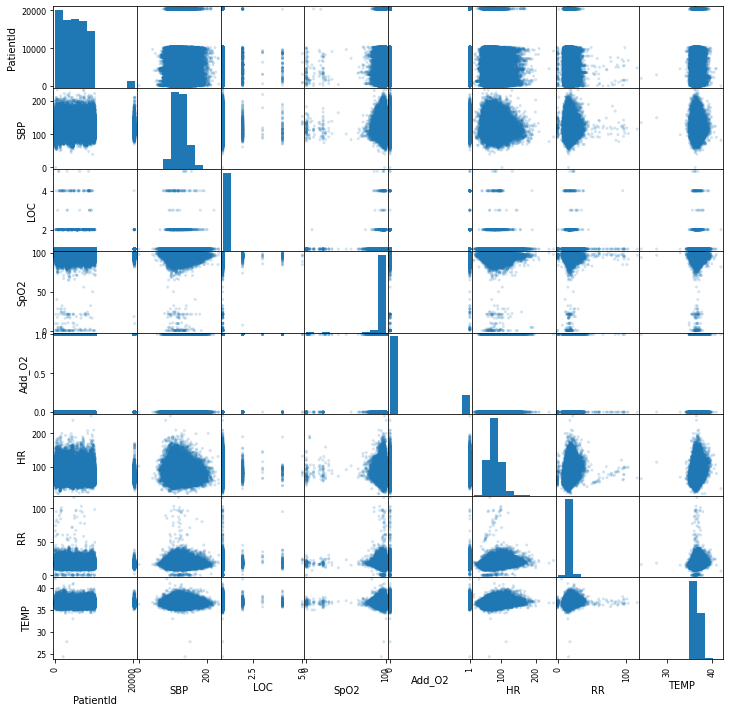

In [56]:
pd.plotting.scatter_matrix(PatientData, alpha=0.2, figsize=(12,12))

array([[<AxesSubplot:xlabel='SBP', ylabel='SBP'>,
        <AxesSubplot:xlabel='LOC', ylabel='SBP'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SBP'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SBP'>,
        <AxesSubplot:xlabel='HR', ylabel='SBP'>,
        <AxesSubplot:xlabel='RR', ylabel='SBP'>,
        <AxesSubplot:xlabel='TEMP', ylabel='SBP'>],
       [<AxesSubplot:xlabel='SBP', ylabel='LOC'>,
        <AxesSubplot:xlabel='LOC', ylabel='LOC'>,
        <AxesSubplot:xlabel='SpO2', ylabel='LOC'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='LOC'>,
        <AxesSubplot:xlabel='HR', ylabel='LOC'>,
        <AxesSubplot:xlabel='RR', ylabel='LOC'>,
        <AxesSubplot:xlabel='TEMP', ylabel='LOC'>],
       [<AxesSubplot:xlabel='SBP', ylabel='SpO2'>,
        <AxesSubplot:xlabel='LOC', ylabel='SpO2'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SpO2'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SpO2'>,
        <AxesSubplot:xlabel='HR', ylabel='SpO2'>,
        <AxesSubplot:xlabel='RR', 

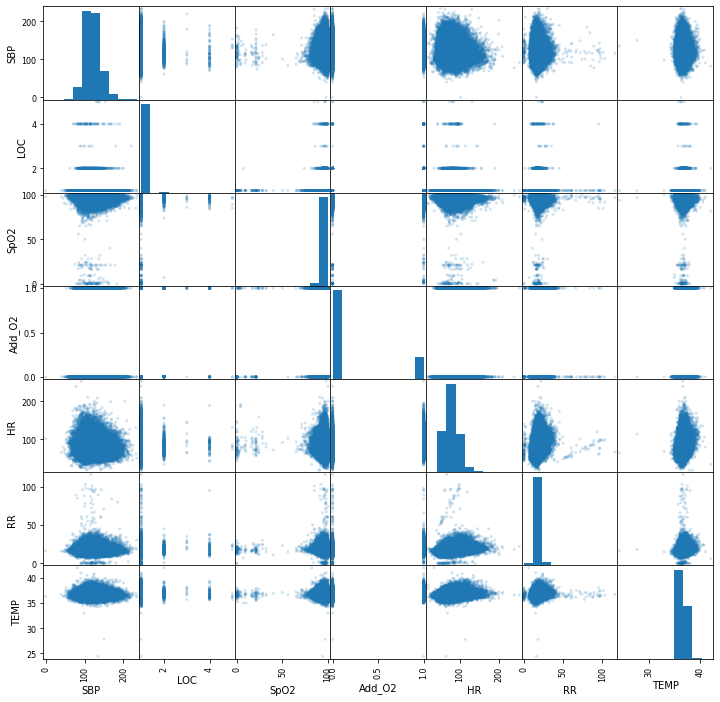

In [59]:
pd.plotting.scatter_matrix(DataSubset, alpha=0.2, figsize=(12,12))

To represent a dataset that has two features, we can use 3d visualization.

**Exercice :** Use a 3d matplotlib (or other) to view the dataset. 

If you change the camera angle, you should come across something that looks like this: 
<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercice :** Use ``plt.tight_layout()`` method to display the point clouds for each variable

**Exercise :** Show correlation coefficients. 

### Split the dataset

You now know the process!

**Exercise :** Import train_test_split from sklearn and split the dataset and create the variables X_train, X_test, y_train, y_test.

##  Load and fit the model (with Sklearn)

Then how to make with the sklearn model ? Well, it's simple, you don't change anything. Sklearn takes care of everything for you.

1. Import LinearRegression from sklearn
2. Create a regressor variable and instantiate your LinearRegression class.
3. Train your model with X_train and y_train
4. Display the score of your model with X_train and y_train.
5. Use the predict method of your model on your test dataset (X_test).
6. Display the score of your model with X_test and y_test.

And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X . \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are characteristics +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
.
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable X which contains a matrix (100,3) with two column's filled with values of our dataframe and then another one with 1's.

**Exercice :** Check that your matrix is of shape (100,3) 

**Exercise :** Create the theta vector with three random values. Your vector must be of dimension 
(3,1)

## Create and fit the model
### Define your model

**Exercise :** Create a model function that receives as parameter X and theta. The function must return the vector Y. This is exactly the same model as last time. 

### Cost function

Well we have the model, the theta vector, the X matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum _ {i=1}^m (X . \theta - y)^2$$

**Exercise :** Create a MSE function that receives in parameter X, y and theta using the example above.

### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T.(X.\theta - y)$$

**Exercise :** Create a grad function that receives as parameter X, y, theta.

**Exercise :**

1. Create a gradient_descent funcion that receives as parameter X, y, theta, learning_rate, n_iterations
2. In the function, create a variable cost_history with a matrix filled with 0 and which has a length of n_iterations.We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to n_iterations
4. In the loop, update theta with the formula of the gradient descent (The example above)
5. In the loop, update cost_history[i] with the values of MSE(X,y,theta)
6. return theta and cost_history

### Train your model 

**Exercise :** Create variables n_iterations and learning_rate.

**Exercise:** Create variables theta_final, cost history and instance gradient_descent().

**Exercise :** 
Create a predictions variable that contains model(X, theta_final).



**Exercise :** Project in 3d your predictions and the true values of the dataset

**Exercise :** Plot cost_history

### Evaluation

In [32]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [33]:
coef_determination(y, predictions)

NameError: name 'y' is not defined

### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">